# WeatherPy

In [1]:
#Dependencies 
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
import requests
import matplotlib.pyplot as plt
import datetime
from scipy.stats import linregress

#Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


#Import api key for OpenWeatherMap API
from api_keys import w_api_key

#Should whoever checking this code require their own, comment out/delete the above line and assign your own key.
#w_api_key = "YOUR KEY HERE"


### Generate the Cities List by Using the `citipy` Library

In [2]:
#   List for holding latitude/longitude combinations
lat_lons = []

#   List for holding the cities names
cities = []

#   Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

#   Create a set of latitude and longitude combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lons = np.random.uniform(lon_range[0], lon_range[1], size = 1500)
lat_lons = zip(lats,lons)

for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0],lat_lon[1]).city_name

    #Conditional to check if city name is unique; unique cities are appended to cities list
    if city not in cities:
        cities.append(city)


#   Print the city count to confirm sufficient count
print(f"Number of Unique Cities found: {len(cities)}")

Number of Unique Cities found: 593


----

# 1) Create Plots to showcase the relationship between weather variables and latitude

###  Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
#   Base url for api search
base_url = "https://api.openweathermap.org/data/2.5/weather"

#   Params to include:
params = {"appid" : w_api_key,
            "units":"metric"
}

#   Empty list to fetch weather data for each city
city_data = []

#   Print to logger
print("Beginning Data Retrieval      ")
print("-----------------------------")

#   Create Counters
record_count = 1
set_count = 1

#   Loop through all the cities in list
for i,city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Add city to q parameter
    params["q"] = city

    # Log url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))


    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(base_url, params = params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")

#   Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | tecoanapa
Processing Record 4 of Set 1 | padang
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | aasiaat
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | magadan
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | taman
Processing Record 17 of Set 1 | tocopilla
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | taoudenni
Processing Record 20 of Set 1 | portland
Processing Record 21 of Set 1 | santa maria
Processing Record 22 of S

In [32]:
#   Create Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#   Show Record Count
city_data_df.count()

City          543
Lat           543
Lon           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [33]:
#   Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.7035,30.7861,1.94,97,100,5.09,RU,1673851167
1,mataura,-46.1927,168.8643,21.19,54,80,1.59,NZ,1673851168
2,tecoanapa,16.5167,-98.7500,22.71,89,0,1.90,MX,1673851168
3,padang,-0.9492,100.3543,29.03,74,71,2.79,ID,1673851144
4,hermanus,-34.4187,19.2345,23.22,73,54,7.00,ZA,1673851169


In [34]:
#   Export city_data_df into a csv
outpath = os.path.join("output_data","cities.csv")
city_data_df.to_csv(outpath, index = False)

In [35]:
#   Read Saved Data
inpath = os.path.join("output_data","cities.csv")
city_data_df = pd.read_csv(inpath)

#   Display Sample Data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.7035,30.7861,1.94,97,100,5.09,RU,1673851167
1,mataura,-46.1927,168.8643,21.19,54,80,1.59,NZ,1673851168
2,tecoanapa,16.5167,-98.7500,22.71,89,0,1.90,MX,1673851168
3,padang,-0.9492,100.3543,29.03,74,71,2.79,ID,1673851144
4,hermanus,-34.4187,19.2345,23.22,73,54,7.00,ZA,1673851169


### Create the Scatter Plots Requested

#### Latitude vs Temperature

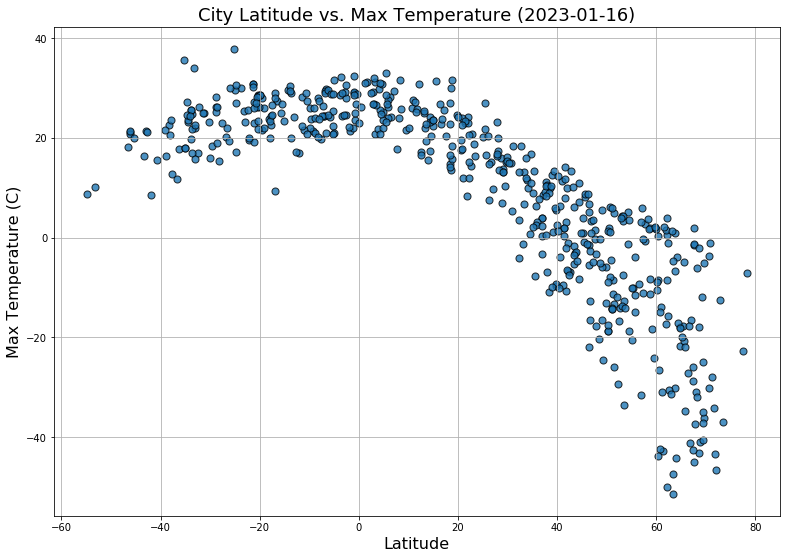

In [36]:
#   Build scatter plot for latitude vs. temerature
date = datetime.datetime.fromtimestamp(city_data_df["Date"][0]).date()

#
city_plot = city_data_df.plot(kind = "scatter", 
                                x = "Lat", 
                                y = "Max Temp", 
                                figsize = (13,9), 
                                marker = "o", 
                                edgecolors = "black", 
                                s = 50,
                                alpha = 0.8)

#   Graph Properties
city_plot.set_title(f"City Latitude vs. Max Temperature ({date})", fontsize = 18)
city_plot.set_xlabel("Latitude", fontsize = 16)
city_plot.set_ylabel("Max Temperature (C)", fontsize = 16)
plt.grid(True)


#   Show Plot
plt.show()

#### Latitude vs Humidity

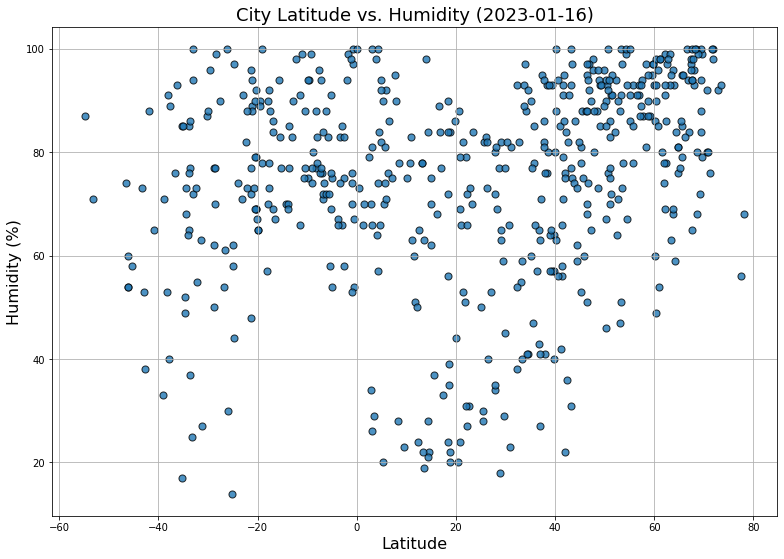

In [37]:
#   Build scatter plot for latitude vs. humidity
date = datetime.datetime.fromtimestamp(city_data_df["Date"][0]).date()

#
city_plot = city_data_df.plot(kind = "scatter", 
                                x = "Lat", 
                                y = "Humidity", 
                                figsize = (13,9), 
                                marker = "o", 
                                edgecolors = "black", 
                                s = 50,
                                alpha = 0.8)

#   Graph Properties
city_plot.set_title(f"City Latitude vs. Humidity ({date})", fontsize = 18)
city_plot.set_xlabel("Latitude", fontsize = 16)
city_plot.set_ylabel("Humidity (%)", fontsize = 16)
plt.grid(True)


#   Show Plot
plt.show()

#### Latitude vs Cloudiness

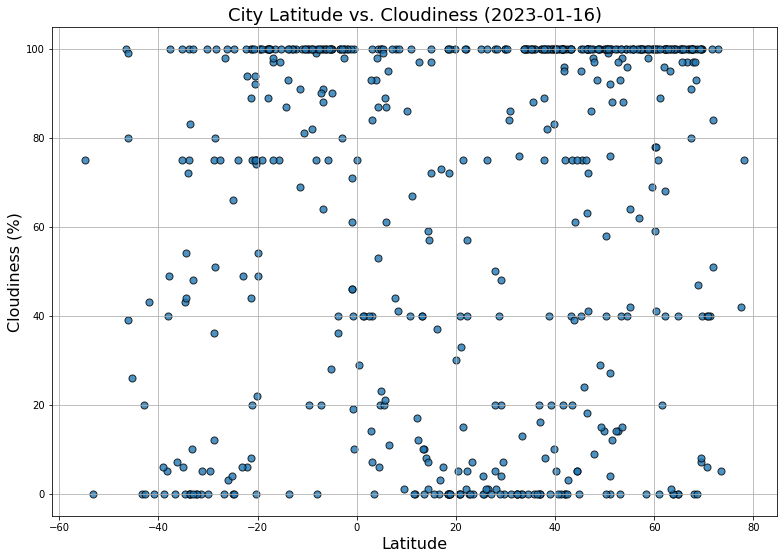

In [38]:
#   Build scatter plot for latitude vs. temerature
date = datetime.datetime.fromtimestamp(city_data_df["Date"][0]).date()

#
city_plot = city_data_df.plot(kind = "scatter", 
                                x = "Lat", 
                                y = "Cloudiness", 
                                figsize = (13,9), 
                                marker = "o", 
                                edgecolors = "black", 
                                s = 50,
                                alpha = 0.8)

#   Graph Properties
city_plot.set_title(f"City Latitude vs. Cloudiness ({date})", fontsize = 18)
city_plot.set_xlabel("Latitude", fontsize = 16)
city_plot.set_ylabel("Cloudiness (%)", fontsize = 16)
plt.grid(True)


#   Show Plot
plt.show()

#### Latitude vs Wind Speed

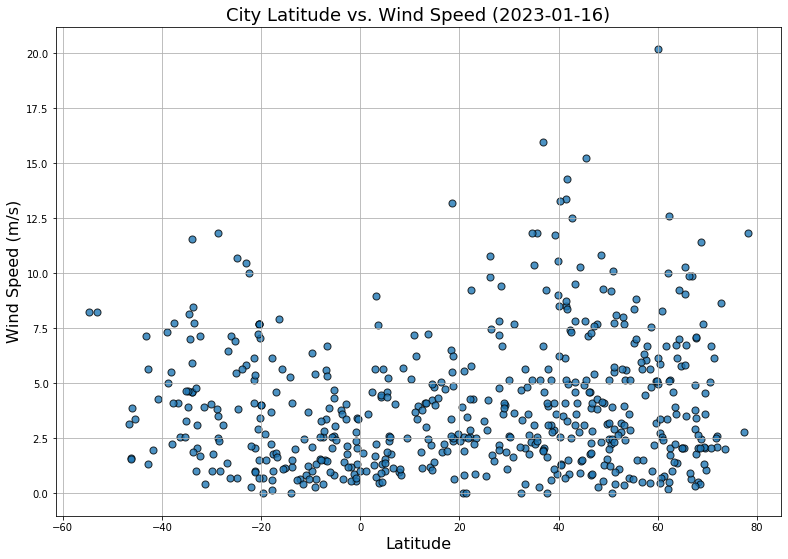

In [39]:
#   Build scatter plot for latitude vs. temerature
date = datetime.datetime.fromtimestamp(city_data_df["Date"][0]).date()

#
city_plot = city_data_df.plot(kind = "scatter", 
                                x = "Lat", 
                                y = "Wind Speed", 
                                figsize = (13,9), 
                                marker = "o", 
                                edgecolors = "black", 
                                s = 50,
                                alpha = 0.8)

#   Graph Properties
city_plot.set_title(f"City Latitude vs. Wind Speed ({date})", fontsize = 18)
city_plot.set_xlabel("Latitude", fontsize = 16)
city_plot.set_ylabel("Wind Speed (m/s)", fontsize = 16)
plt.grid(True)


#   Show Plot
plt.show()

-----

# 2) Compute Linear Regression for Each Relationship

In [40]:
#   Define a function to create linear regression plots

def scatter_regression(data, x, y, ann_loc = (0,0)):
    #   Build scatter plot 
    try:
        date = datetime.datetime.fromtimestamp(data["Date"][0]).date()
    except Exception as e:
        date = "Error in finding Date"

    
    try:
        city_plot = data.plot(kind = "scatter", 
                                        x = x, 
                                        y = y, 
                                        figsize = (13,9), 
                                        marker = "o", 
                                        edgecolors = "black", 
                                        s = 50,
                                        alpha = 0.8)
    except Exception as e:
        print(e.args[0])

    #   Graph Properties
    city_plot.set_title(f"City {x} vs. {y} ({date})", fontsize = 18)
    city_plot.set_xlabel(f"{x}", fontsize = 16)
    city_plot.set_ylabel(f"{y}", fontsize = 16)
    plt.grid(True)

    x_val = data[x]
    y_val= data[y]

    slope, intercept, rval, pval, stderr= linregress(x = x_val, y = y_val)
    regressionline = slope*x_val + intercept

    plt.plot(x_val,regressionline, c = "r")

    plt.annotate(f"y = {round(slope, 2)}x + {round (intercept,2)}", xy = ann_loc, c = "r", fontsize = 15)

    #   Print R value
    print(f"The r-value is: {rval}")
    #   Show Plot
    plt.show()



In [41]:
#   Create a DataFrame with the Northern Hemisphere data (Latitude >=0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0].reset_index()

#   Display sample data
northern_hemi_df.head()

,index,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,nikolskoye,59.7035,30.7861,1.94,97,100,5.09,RU,1673851167
1,2,tecoanapa,16.5167,-98.7500,22.71,89,0,1.90,MX,1673851168
2,7,aasiaat,68.7098,-52.8699,-17.98,68,100,11.44,GL,1673851172
3,10,klaksvik,62.2266,-6.5890,0.51,69,100,12.59,FO,1673851174
4,11,magadan,59.5667,150.8000,-24.15,95,69,3.20,RU,1673851174


In [42]:
#   Create a DataFrame with the Southern Hemisphere data (Latitude <0)

southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0].reset_index()

#   Display sample data
southern_hemi_df.head()

,index,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,mataura,-46.1927,168.8643,21.19,54,80,1.59,NZ,1673851168
1,3,padang,-0.9492,100.3543,29.03,74,71,2.79,ID,1673851144
2,4,hermanus,-34.4187,19.2345,23.22,73,54,7.00,ZA,1673851169
3,5,mar del plata,-38.0023,-57.5575,20.61,91,40,2.24,AR,1673851171
4,6,codrington,-38.2667,141.9667,22.59,53,5,5.54,AU,1673851171


### Temperature vs Latitude Linear Regression Plot

The r-value is: -0.8506761775900049


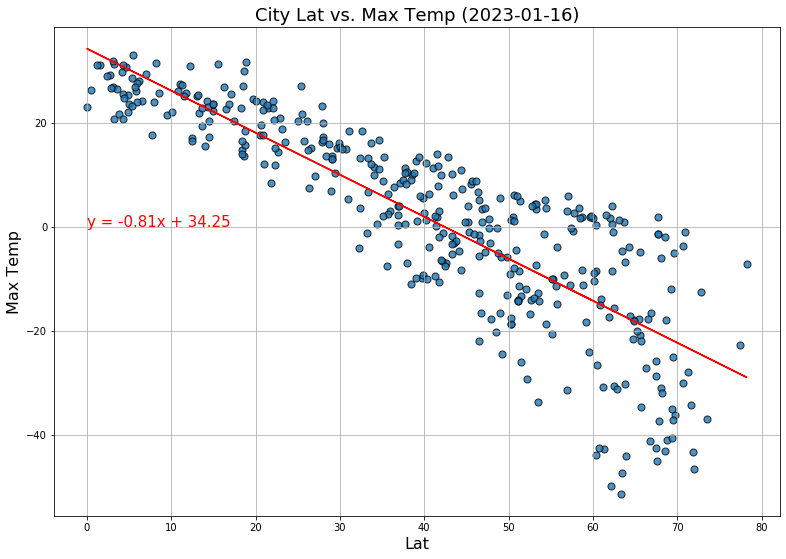

In [43]:
#   Northern Hemisphere
scatter_regression(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.44110672015636604


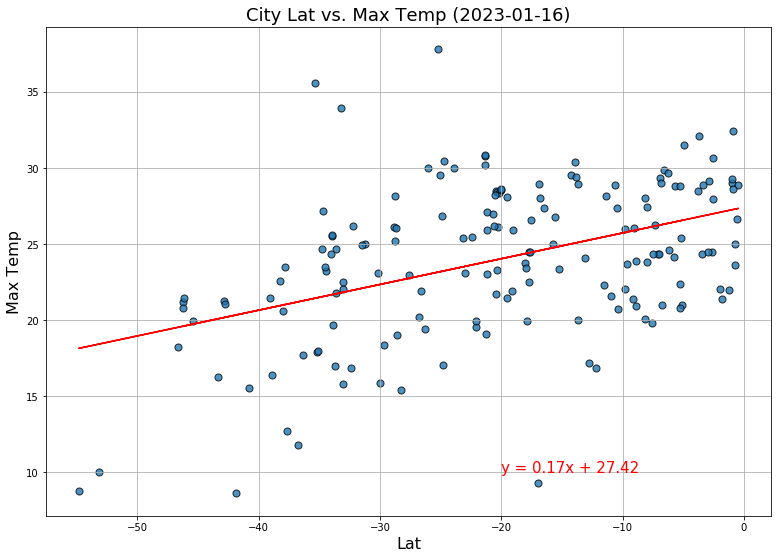

In [44]:
#   Southern Hemisphere
scatter_regression(southern_hemi_df, "Lat", "Max Temp", (-20,10))

**Discussion about the linear relationship:**

The farther away from Latitude = 0, the lower the maximum temperature of each city; likewise, the closer to latitude 0 the cities are, the higher the maximum temperature.

- The R value in the plot of the southern hemisphere in this case is quite low, perhaps an analysis of how longitude affects temperature is in order too.
- - This low R value may be attributed to less data points for cities in the southern hemisphere.

Furthermore, the intercepts of both hemisphere plots are quite close, possibly supporting the parabolic shape of the full plot

### Humidity vs Latitude Linear Regression Plot

The r-value is: 0.42202152219749134


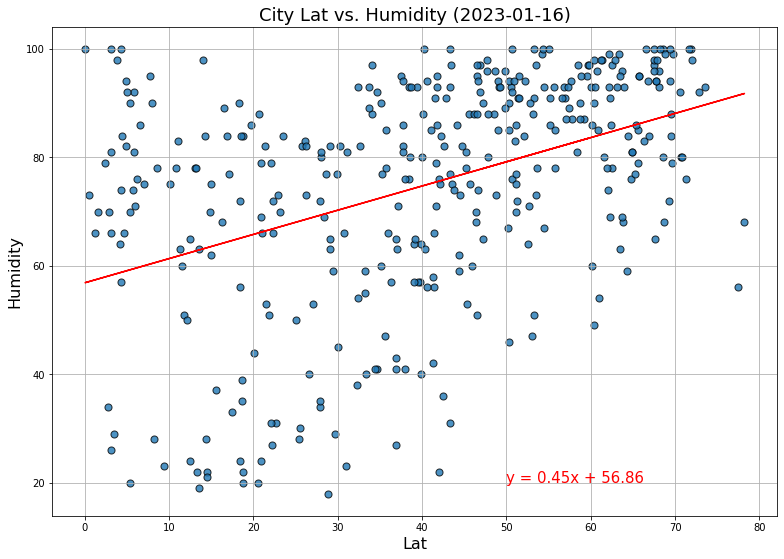

In [45]:
#   Northern Hemisphere
scatter_regression(northern_hemi_df, "Lat", "Humidity", (50,20))

The r-value is: 0.28040813588179947


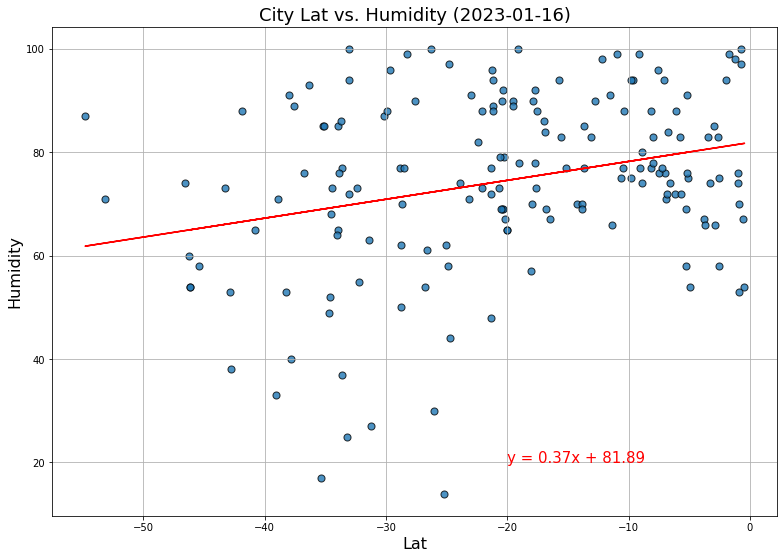

In [46]:
#   Southern Hemisphere
scatter_regression(southern_hemi_df, "Lat", "Humidity", (-20,20))

**Discussion about the linear relationship:**

The higher the latitude, the higher the humidity. This is shown in both hemispheres, but oddly enough, the intercepts of both equations are not similar, therefore this relationship may be spurious.

- Longitude ought to be checked to see if it plays a bigger role in humidity as the R values are both quite low here

### Cloudiness vs Latitude Linear Regression Plot

The r-value is: 0.27357938262216963


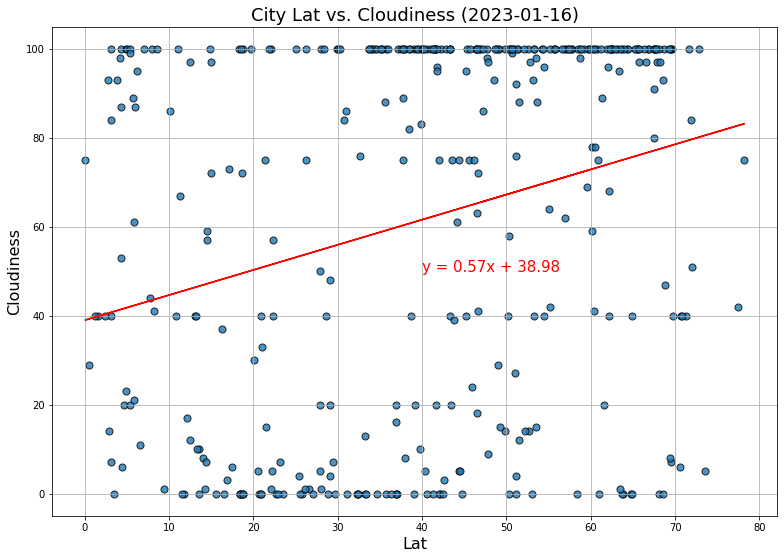

In [48]:
#   Northern Hemisphere
scatter_regression(northern_hemi_df, "Lat", "Cloudiness", (40,50))

The r-value is: 0.435921785685364


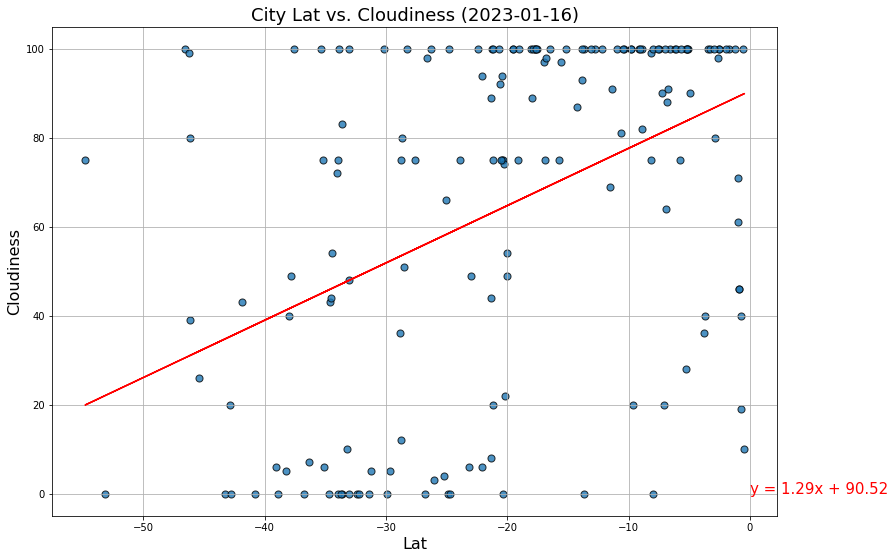

In [49]:
#   Southern Hemisphere
scatter_regression(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:**

The low R values in both plots might indicate that there is a spurious relationship between Latitude and Cloudiness. However, It is worth noting that both plots have a positive relationship.

- Regardless, other factors should be checked to account for cloudiness.

- Also, the intercepts are not the same, so there isn't a straight positive relationship starting from negative to positive latitudes

### Wind Speed vs Latitude Linear Regression Plot

The r-value is: 0.12658145043317678


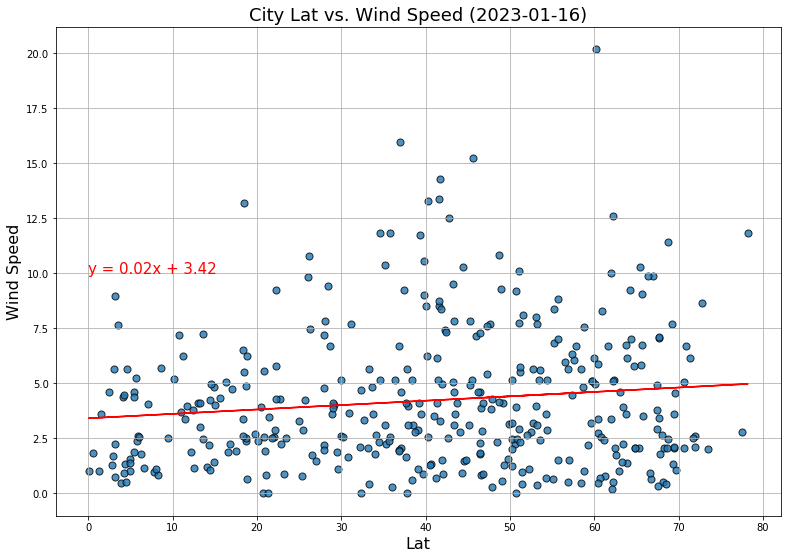

In [50]:
#   Northern Hemisphere
scatter_regression(northern_hemi_df, "Lat", "Wind Speed", (0,10))

The r-value is: -0.3534163645014583


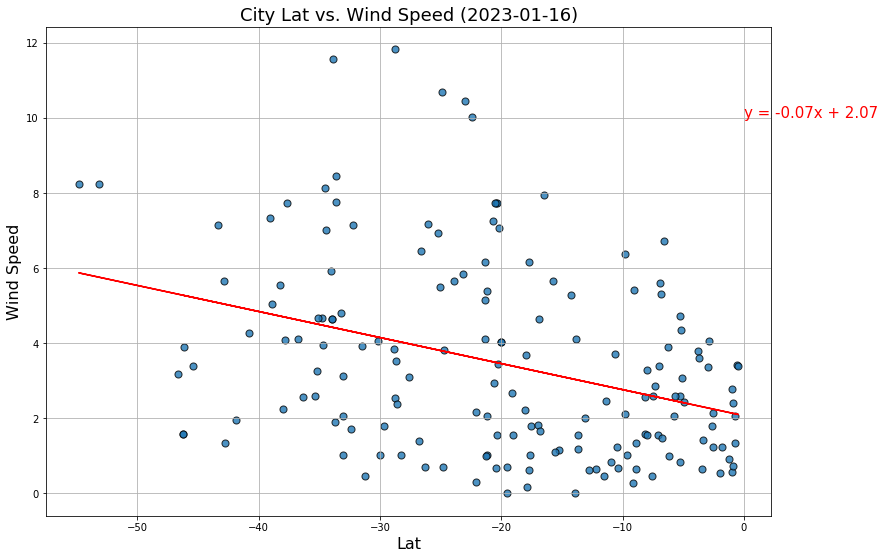

In [51]:
#   Northern Hemisphere
scatter_regression(southern_hemi_df, "Lat", "Wind Speed",(0,10))

**Discussion about the linear relationship:**

Wind speed appears to have a parabolic relationship concaving up. Wind speed increases the farther away a city is from latitude = 0. 

- The intercepts are quite similar, further supporting this possibility.